In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_csv('../input/all-animes-in-mal/mal_anime.csv', index_col=[0])
df.head()

,title,episodes,status,theme,demographic,genres,type,favorites,popularity,rank,score,members,synopsis,aired,duration,premiered,studios
0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,"218,277",#3,#1,9.10,"3,190,961",After a horrific alchemy experiment goes wrong...,"Apr 5, 2009 to Jul 4, 2010",24 min. per ep.,Spring 2009,Bones
1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,"183,596",#13,#2,9.07,"2,452,142",Eccentric scientist Rintarou Okabe has a never...,"Apr 6, 2011 to Sep 14, 2011",24 min. per ep.,Spring 2011,White Fox
2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,"18,421",#458,#3,9.06,"455,428",Substitute Soul Reaper Ichigo Kurosaki spends ...,"Oct 11, 2022 to Dec 27, 2022",24 min. per ep.,Fall 2022,Pierrot
3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,"16,042",#332,#4,9.06,"599,235","Gintoki, Shinpachi, and Kagura return as the f...","Apr 8, 2015 to Mar 30, 2016",24 min. per ep.,Spring 2015,Bandai Namco Pictures
4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,"29,397",#193,#5,9.05,"832,346",The elite members of Shuchiin Academy's studen...,"Apr 9, 2022 to Jun 25, 2022",23 min. per ep.,Spring 2022,A-1 Pictures


In [2]:
df.dtypes

title           object
episodes        object
status          object
theme           object
demographic     object
genres          object
type            object
favorites       object
popularity      object
rank            object
score          float64
members         object
synopsis        object
aired           object
duration        object
premiered       object
studios         object
dtype: object

In [3]:
df.isna().sum()

title             0
episodes          0
status            0
theme             0
demographic       0
genres            0
type              0
favorites         0
popularity        0
rank           4065
score          8968
members           0
synopsis          0
aired             0
duration          0
premiered         0
studios           0
dtype: int64

<Axes: >

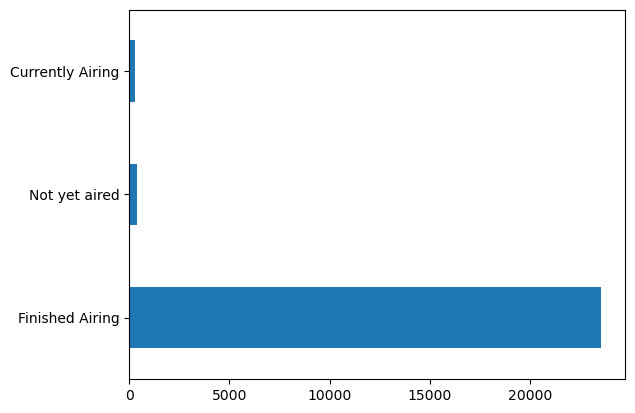

In [4]:
df['status'].value_counts().plot(kind='barh')

<Axes: >

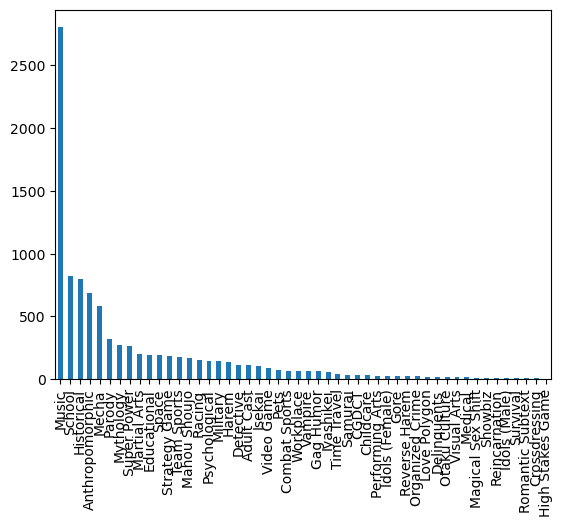

In [5]:
df[df['theme'] != 'Unknown']['theme'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

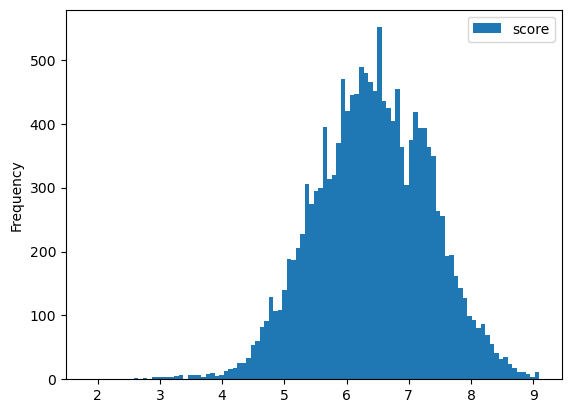

In [6]:
%matplotlib inline
df.plot.hist(column='score', bins=100)